In [29]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [30]:
class AgentState(TypedDict):
        number1: int
        operator: str
        number2: int
        result: int
    

In [31]:
def addition_node(state: AgentState) -> AgentState:
    state["result"] = state["number1"] + state["number2"]
    return state

def subtraction_node(state: AgentState) -> AgentState:
    state["result"] = state["number1"] - state["number2"]
    return state

def multiplication_node(state: AgentState) -> AgentState:
    state["result"] = state["number1"] * state["number2"]
    return state

def division_node(state: AgentState) -> AgentState:
    state["result"] = state["number1"] / state["number2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    if state["operator"] == "+":
        return "addition_node"
    elif state["operator"] == "-":
        return "subtraction_node"
    elif state["operator"] == "*":
        return "multiplication_node"
    elif state["operator"] == "/":
        return  "division_node"


In [32]:
graph = StateGraph(AgentState)

graph.add_node("addition_node", addition_node)
graph.add_node("subtraction_node", subtraction_node)
graph.add_node("multiplication_node", multiplication_node)
graph.add_node("division_node", division_node)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
 {
    "addition_node": "addition_node",
    "subtraction_node": "subtraction_node",
    "multiplication_node": "multiplication_node",
    "division_node": "division_node"
 }
)
graph.add_edge("addition_node", END)
graph.add_edge("subtraction_node", END)
graph.add_edge("multiplication_node", END)
graph.add_edge("division_node", END)


app = graph.compile()

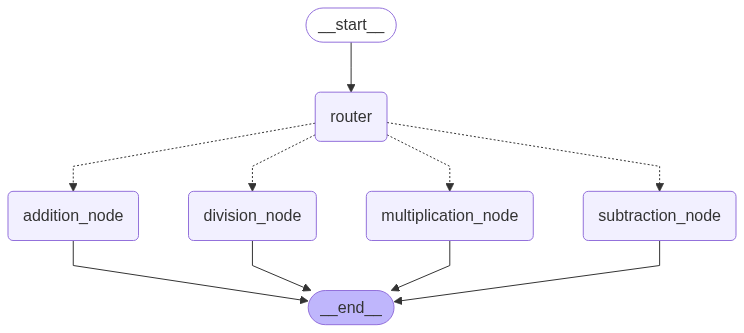

In [33]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
r = app.invoke({"number1": 10, "operator": "*", "number2": 5})
print(r["result"])

50
